In [1]:
import time
import pandas as pd

from matplotlib import pyplot as plt
from mlrose_hiive import MaxKColorGenerator
from mlrose_hiive import RHCRunner, SARunner, GARunner, MIMICRunner

In [2]:
%%time
problem_name = "Max K Color"
problem = MaxKColorGenerator().generate(seed=1, number_of_nodes=100, max_connections_per_node=3, max_colors=3)

CPU times: total: 2.31 s
Wall time: 2.31 s


## Randomized Hill Climbing

In [3]:
# RHCRunner?

In [4]:
%%time
rhc = RHCRunner(problem=problem,
                experiment_name='mkc',
                output_directory="output",
                seed=1,
                iteration_list=[1000],
                restart_list=[0],
                max_attempts=1000
                )

rhc_run_stats, rhc_run_curves = rhc.run()

CPU times: total: 281 ms
Wall time: 290 ms


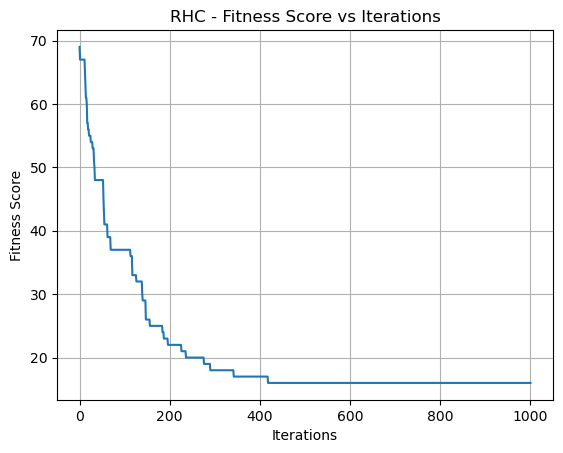

In [5]:
# Plot fitness score
plt.plot(rhc_run_curves["Fitness"].values)

plt.xlabel("Iterations")
plt.ylabel("Fitness Score")
plt.title("RHC - Fitness Score vs Iterations")
plt.grid()

## Simulated Annealing

In [6]:
# SARunner?

In [7]:
%%time
sa = SARunner(problem=problem,
              experiment_name='mkc',
              output_directory="output",
              seed=1,
              iteration_list=[1000],
              temperature_list= [0.1]
              )

sa_run_stats, sa_run_curves = sa.run()

CPU times: total: 234 ms
Wall time: 240 ms


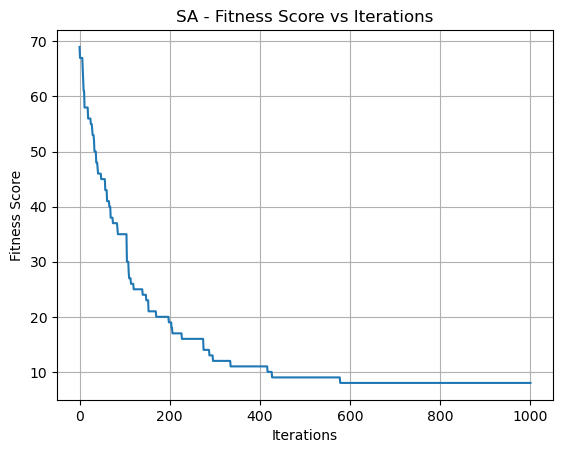

In [8]:
# Plot fitness score
plt.plot(sa_run_curves["Fitness"].values)

plt.xlabel("Iterations")
plt.ylabel("Fitness Score")
plt.title("SA - Fitness Score vs Iterations")
plt.grid()

## Genetic Algorithm

In [9]:
# GARunner?

In [10]:
%%time
ga = GARunner(problem=problem,
              experiment_name='mkc',
              output_directory="output",
              seed=1,
              iteration_list=[1000],
              population_sizes=[25],
              mutation_rates=[.1]
              )

ga_run_stats, ga_run_curves = ga.run()

CPU times: total: 3.14 s
Wall time: 3.14 s


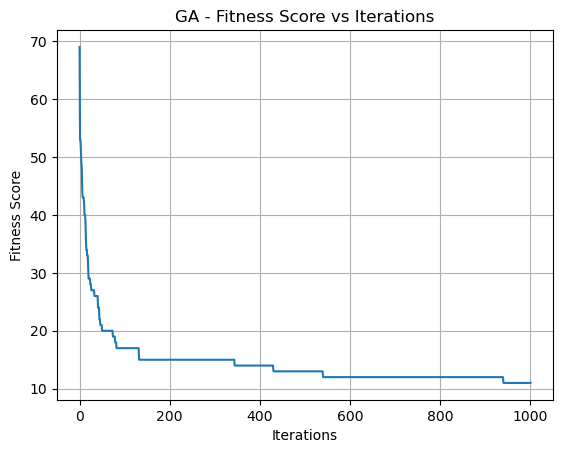

In [11]:
# Plot fitness score
plt.plot(ga_run_curves["Fitness"].values)

plt.xlabel("Iterations")
plt.ylabel("Fitness Score")
plt.title("GA - Fitness Score vs Iterations")
plt.grid()

## MIMIC

In [12]:
# MIMICRunner?

In [13]:
%%time
mimic = MIMICRunner(problem=problem,
              experiment_name='mkc',
              output_directory="output",
              seed=1,
              iteration_list=[1000],
              population_sizes=[10],
              keep_percent_list=[0.1],
              use_fast_mimic=True
              )

mimic_run_stats, mimic_run_curves = mimic.run()

CPU times: total: 12.4 s
Wall time: 12.4 s


In [14]:
mimic_run_curves

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.001092,69.0,10.0,True,10,0.1,1000
1,1,0.030475,53.0,22.0,True,10,0.1,1000
2,2,0.057149,53.0,33.0,True,10,0.1,1000
3,3,0.080420,53.0,44.0,True,10,0.1,1000
4,4,0.103081,53.0,55.0,True,10,0.1,1000
...,...,...,...,...,...,...,...,...
497,497,12.319200,53.0,5478.0,True,10,0.1,1000
498,498,12.342123,53.0,5489.0,True,10,0.1,1000
499,499,12.365092,53.0,5500.0,True,10,0.1,1000
500,500,12.388116,53.0,5511.0,True,10,0.1,1000


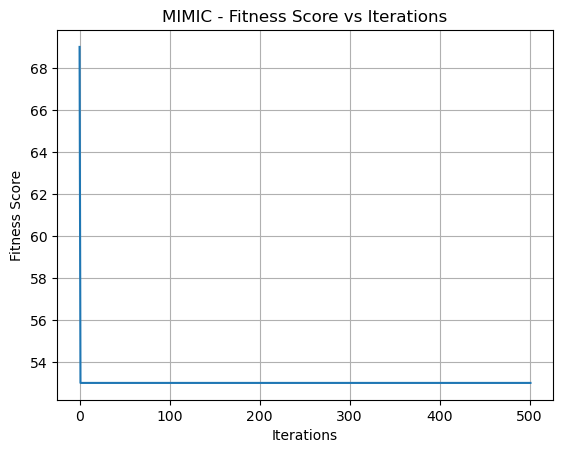

In [15]:
# Plot fitness score
plt.plot(mimic_run_curves["Fitness"].values)

plt.xlabel("Iterations")
plt.ylabel("Fitness Score")
plt.title("MIMIC - Fitness Score vs Iterations")
plt.grid()

## Comparing Algorithms

In [16]:
rhc_run_stats["algo"] = "rhc"
sa_run_stats["algo"] = "sa"
ga_run_stats["algo"] = "ga"
mimic_run_stats["algo"] = "mimic"

In [17]:
df = pd.concat([rhc_run_stats, sa_run_stats, ga_run_stats, mimic_run_stats]).dropna(axis=1)
df = df[df["Iteration"]!=0]
df

,Iteration,Fitness,FEvals,Time,State,max_iters,algo
1,1000,16.0,1034,0.265334,"[1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, ...",1000,rhc
1,1000,8.0,1240,0.220504,"[0, 0, 2, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, ...",1000,sa
1,1000,11.0,26054,3.109134,"[1, 2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0, 1, ...",1000,ga
1,1000,53.0,5522,12.412119,"[0.0, 2.0, 0.0, 1.0, 1.0, 0.0, 1.0, 2.0, 0.0, ...",1000,mimic


### Fitness Score vs Iterations

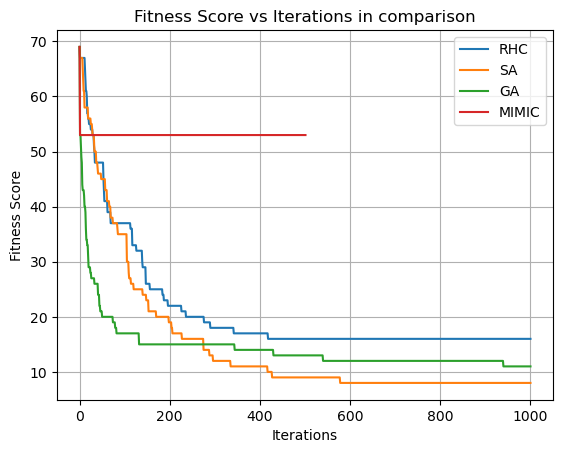

In [18]:
# Plot fitness score
plt.plot(rhc_run_curves["Fitness"].values, label='RHC')
plt.plot(sa_run_curves["Fitness"].values, label='SA')
plt.plot(ga_run_curves["Fitness"].values, label='GA')
plt.plot(mimic_run_curves["Fitness"].values, label='MIMIC')

plt.xlabel("Iterations")
plt.ylabel("Fitness Score")
plt.title("Fitness Score vs Iterations in comparison")
plt.legend()
plt.grid()
plt.savefig('image/mkc_fitness.png')

### Iteration Time

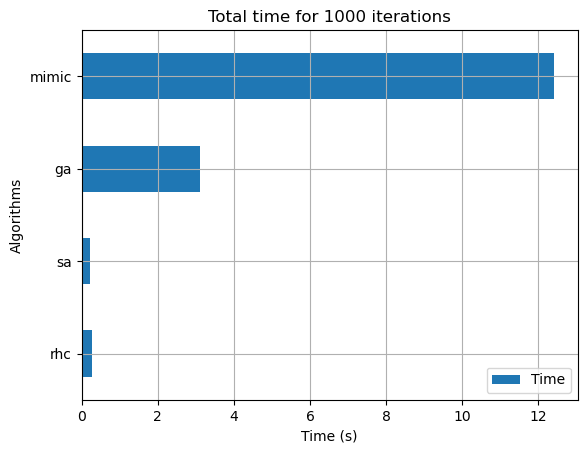

In [19]:
# Plot fitness score
df.plot.barh(x='algo', y='Time')

plt.xlabel("Time (s)")
plt.ylabel("Algorithms")
plt.title("Total time for 1000 iterations")
plt.grid()
plt.savefig('image/mkc_time.png')